# Fall 2020 -> INSY 5376 -> Big Data & Deep Learning
## Homework 2
### Name: Phanikrishna Karanam (UTA ID# 1001851985)

#### Assignment on Building a Neural Network from Scratch

__Summary__: 
This program is to build a simple neural network for classification that has the following architecture:
 - An input layer that can accept any number of X values
 - A hidden layer (can be specified during model training)  with RELU activation
 - A single node output with Sigmoid activation 

__About Dataset__: 
We will use the breast cancer dataset for this assignment

In [ ]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

 - Load breast cancer dataset and examine the dataset shape and target distribution
 - We notice there is a class imbalance problem

In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np

data = load_breast_cancer()
features = data.data
target = data.target

print('Shape of Features: ', features.shape)
print(features)
print('\nShape of Target and count distribution: {} {}'.format(target.shape, np.bincount(target)))
print(target)

Shape of Features:  (569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

Shape of Target and count distribution: (569,) [212 357]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1

 - Use SMOTE oversampling technique to address the class imbalance problem

In [3]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state = 32)
features, target = oversampler.fit_sample(features, target)

print('Shape of Features: ', features.shape)
print(features)
print('\nShape of Target and count distribution: {} {}'.format(target.shape, np.bincount(target)))
print(target)

Shape of Features:  (714, 30)
[[1.79900000e+01 1.03800000e+01 1.22800000e+02 ... 2.65400000e-01
  4.60100000e-01 1.18900000e-01]
 [2.05700000e+01 1.77700000e+01 1.32900000e+02 ... 1.86000000e-01
  2.75000000e-01 8.90200000e-02]
 [1.96900000e+01 2.12500000e+01 1.30000000e+02 ... 2.43000000e-01
  3.61300000e-01 8.75800000e-02]
 ...
 [1.86221425e+01 1.79835121e+01 1.21183671e+02 ... 1.62081919e-01
  2.93275889e-01 8.30348826e-02]
 [2.01986327e+01 1.63098798e+01 1.34241147e+02 ... 1.64455261e-01
  2.53595333e-01 7.82181219e-02]
 [2.13888944e+01 2.05582691e+01 1.44633655e+02 ... 2.72303368e-01
  3.59403132e-01 9.01033185e-02]]

Shape of Target and count distribution: (714,) [357 357]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1

 - Input dataset has 30 features and all are of type float with no null values present

In [4]:
import pandas as pd

df = pd.DataFrame(features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 30 columns):
0     714 non-null float64
1     714 non-null float64
2     714 non-null float64
3     714 non-null float64
4     714 non-null float64
5     714 non-null float64
6     714 non-null float64
7     714 non-null float64
8     714 non-null float64
9     714 non-null float64
10    714 non-null float64
11    714 non-null float64
12    714 non-null float64
13    714 non-null float64
14    714 non-null float64
15    714 non-null float64
16    714 non-null float64
17    714 non-null float64
18    714 non-null float64
19    714 non-null float64
20    714 non-null float64
21    714 non-null float64
22    714 non-null float64
23    714 non-null float64
24    714 non-null float64
25    714 non-null float64
26    714 non-null float64
27    714 non-null float64
28    714 non-null float64
29    714 non-null float64
dtypes: float64(30)
memory usage: 167.5 KB


 - High variance observed within the data fields, needs scaling of data 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,714.0,14.773998,3.674853,6.981000,12.042500,13.920000,17.409694,28.11000
1,714.0,19.754546,4.170298,9.710000,16.850000,19.581675,22.149308,39.28000
2,714.0,96.551011,25.384176,43.790000,77.587500,90.827448,114.475000,188.50000
3,714.0,716.198075,370.395606,143.500000,445.475000,599.450000,947.950000,2501.00000
4,714.0,0.097989,0.013791,0.052630,0.087957,0.097894,0.106899,0.16340
5,714.0,0.114015,0.054624,0.019380,0.071675,0.107350,0.145398,0.34540
6,714.0,0.103858,0.082004,0.000000,0.035962,0.088210,0.155389,0.42680
7,714.0,0.057052,0.040637,0.000000,0.023340,0.050833,0.086300,0.20120
8,714.0,0.184393,0.027142,0.106000,0.164925,0.182850,0.199725,0.30400
9,714.0,0.063009,0.006912,0.049960,0.058215,0.061910,0.066421,0.09744


 - Split the input data into train and test, by performing a stratified split on the target variable (to ensure equal target      distribution) 

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 32, stratify = target)
print('Shape of x_train:', x_train.shape)
print('Shape of y_train and count distribution: {} {}'.format(y_train.shape, np.bincount(y_train)))

print('\nShape of x_test:', x_test.shape)
print('Shape of y_test and count distribution: {} {}'.format(y_test.shape, np.bincount(y_test)))

Shape of x_train: (571, 30)
Shape of y_train and count distribution: (571,) [286 285]

Shape of x_test: (143, 30)
Shape of y_test and count distribution: (143,) [71 72]


 - Performing scaling on the input data
   - Use train data to fit and transform both the train and test data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

 - Notice the unit standard deviation on train data after scaling

In [8]:
df = pd.DataFrame(x_train)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,571.0,2.386882e-15,1.000877,-2.122983,-0.755809,-0.232397,0.736564,3.423265
1,571.0,8.677142e-16,1.000877,-2.421295,-0.702734,-0.023023,0.585583,4.706031
2,571.0,-1.352100e-15,1.000877,-2.084622,-0.760128,-0.201807,0.729787,3.417429
3,571.0,1.727359e-15,1.000877,-1.570863,-0.744594,-0.313328,0.661033,4.260078
4,571.0,-5.875821e-16,1.000877,-3.254062,-0.718756,-0.001963,0.631329,4.715739
5,571.0,-3.153733e-16,1.000877,-1.730448,-0.766067,-0.115404,0.542114,4.278870
6,571.0,-2.391549e-16,1.000877,-1.262357,-0.808843,-0.187543,0.631248,4.011030
7,571.0,1.856464e-15,1.000877,-1.399556,-0.815599,-0.169097,0.731935,3.613977
8,571.0,-4.388395e-15,1.000877,-2.908561,-0.712773,-0.085139,0.542931,4.466606
9,571.0,1.025119e-14,1.000877,-1.859821,-0.683748,-0.185543,0.516006,4.900467


 - Since data is fit on training and then the same stats are applied for transforming test data, the std dev will not be of unit variance like in training data

In [9]:
df = pd.DataFrame(x_test)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,143.0,0.062872,1.033366,-1.603133,-0.666747,-0.215955,0.691110,3.667159
1,143.0,-0.001171,1.025728,-2.042874,-0.670195,-0.098338,0.515684,2.739207
2,143.0,0.071108,1.046324,-1.569463,-0.691904,-0.234030,0.692460,3.672025
3,143.0,0.071929,1.119341,-1.300976,-0.663766,-0.306250,0.602903,4.954864
4,143.0,0.047303,0.959383,-2.128058,-0.637633,0.008110,0.736955,2.199174
5,143.0,0.069442,1.032056,-1.495619,-0.770767,-0.014026,0.740779,3.120461
6,143.0,0.104222,1.060544,-1.262357,-0.828550,-0.116495,0.858341,3.228918
7,143.0,0.110260,1.057101,-1.399556,-0.819835,-0.044257,0.796559,3.367288
8,143.0,0.057229,1.052764,-2.331212,-0.692286,0.123776,0.750122,3.118217
9,143.0,-0.009309,0.917261,-1.791478,-0.695850,-0.105677,0.436702,4.659842


 - Define all the necessary functions required to implement a Neural Network from scratch

In [124]:
import math 

# RELU activation function at the hidden layer
def Relu(x):
    return (np.maximum(0, x))

# Sigmoid activation function at the output layer. Will return a probability value for the transformed output
def Sigmoid(z):
    return (1 / (1 + np.exp(-z)))

# Compute the loss using binary cross entropy function, for every batch of records being processed and return the loss
def compute_loss(y, a):
    loss = 0
    for i in range(a.shape[0]):
        loss += -(y[i] * np.log(a[i])) - ((1 - y[i]) * np.log(1 - a[i]))
    loss_per_batch = loss / a.shape[0]
    return (loss_per_batch)

# Compute the deravative of RELU function, to be used in gradient calculations. Will return 1, when input is >= 0
def derivative_relu(x):
    return (x >= 0)

# Train the model using training data. Accepts # of hidden nodes, batch size, learning rate and # of epochs as parms
def train_model(x_train, y_train, number_hidden_nodes = 512, batch_size = 32, learning_rate = 0.001, epochs = 50):
    number_output_nodes = 1 
    losses_epoch = []                  # to store the loss per epoch
    
    # Assign random weights for:
    # a) weights between input to hidden -> size is # of input features * # of hidden nodes
    # b) weights between hidden to ouput -> size is # of input features * # of output nodes
    weights_input_hidden = 0.02 * np.random.random((x_train.shape[1], number_hidden_nodes)) - 0.01
    weights_hidden_output = 0.02 * np.random.random((number_hidden_nodes, number_output_nodes)) - 0.01
    
    # Determine # of iterations required to complete one epoch, based on batch size specified
    iterations_per_batch = math.ceil(x_train.shape[0] / batch_size)
    numbers = range(x_train.shape[0])

    for epoch in range(epochs):                 # loop thru the specified # of epochs
        loss = 0
        for i in range(iterations_per_batch):   # Per epoch, loop thru # of iterations, based on batch size
            # Pick random samples from data equivalent to batch size 
            random_samples_index = np.random.choice(numbers, batch_size, replace = False)
            x_train_batch = x_train[random_samples_index, : ]
            y_train_batch = y_train[random_samples_index]
            
            # Feed Forward pass 
            input_to_hidden = x_train_batch.dot(weights_input_hidden)
            output_from_hidden = Relu(input_to_hidden)
             
            hidden_to_output = output_from_hidden.dot(weights_hidden_output)
            a = Sigmoid(hidden_to_output)       # predicted output
                
            # Back propagation: 
            # a) Determine loss  
            loss += compute_loss(y_train_batch, a)
            
            # b) Compute error gradient for weights_hidden_output & weights_input_hidden
            # delta w1 =  (a - y) . output_from_hidden
            dz = a - y_train_batch.reshape(a.shape)
            dw_hidden_output = output_from_hidden.T.dot(dz)
            
            # delta w0 =  (a - y) . (weights_hidden_output) . (1 when x > 0) . Xi
            dz_hidden = dz.dot(weights_hidden_output.T) 
            da_hidden = derivative_relu(dz_hidden)
            dw_input_hidden = x_train_batch.T.dot(da_hidden)
            
            # c) Adjust the weights based on the error gradients determined above and learning rate  
            weights_input_hidden -= (learning_rate * dw_input_hidden)
            weights_hidden_output -= (learning_rate * dw_hidden_output) 
            
        avg_loss_epoch = loss / iterations_per_batch     # determine average loss per epoch and collect for all epochs
        losses_epoch.append(avg_loss_epoch) 
        if epoch % 5 == 0:                               # for every 5 epochs, print the average loss
            print('Epoch # {}, Loss: {}'.format(epoch, avg_loss_epoch))
    return (losses_epoch, weights_input_hidden, weights_hidden_output)  # return the calibrated weights aling with losses

# Function to predict on the test data using the model trained with training data. 
# Run a feed forward pass to determine the output probabilities. Based on the probability threshold, convert to 1 or 0
def predict_target(x_test, weights_ih, weights_ho):
    zh = x_test.dot(weights_ih)
    ah = Relu(zh)
    z = ah.dot(weights_ho)
    a = Sigmoid(z)
    y_pred = np.where(a >= 0.5, 1, 0)
    return (y_pred)

__Train the model__: 
- Update # of hidden nodes, batch size and learning rate -> to view the impact on overall accuracy  

__Note__: 
- Changing the learning rate signficantly impacts the training and test accuracy (between 92% to 99%) and loss / epoch
- Tried changing the hidden nodes and batch size, not much of an impact when compared to learning rate

In [209]:
losses_train, weights_ih, weights_ho = \
        train_model(x_train, y_train, number_hidden_nodes = 512, batch_size = 32, learning_rate = 0.001, epochs = 100)

Epoch # 0, Loss: [0.26800889]
Epoch # 5, Loss: [nan]
Epoch # 10, Loss: [nan]
Epoch # 15, Loss: [nan]
Epoch # 20, Loss: [nan]
Epoch # 25, Loss: [nan]
Epoch # 30, Loss: [nan]
Epoch # 35, Loss: [nan]
Epoch # 40, Loss: [nan]
Epoch # 45, Loss: [nan]
Epoch # 50, Loss: [nan]
Epoch # 55, Loss: [nan]
Epoch # 60, Loss: [nan]
Epoch # 65, Loss: [nan]
Epoch # 70, Loss: [nan]
Epoch # 75, Loss: [nan]
Epoch # 80, Loss: [nan]
Epoch # 85, Loss: [nan]
Epoch # 90, Loss: [nan]
Epoch # 95, Loss: [nan]


__Predict on Training and Test data using the weights obtained from model training__

In [210]:
y_pred_train = predict_target(x_train, weights_ih, weights_ho)
y_pred_test = predict_target(x_test, weights_ih, weights_ho)

 - Print the Classification Report for both Training and Test data
   - Accuracy and F1 score for both training and test data look consistent 

In [213]:
from sklearn.metrics import classification_report

print('Classification report for Training:\n')
print(classification_report(y_train, y_pred_train))

print('Classification report for Test:\n')
print(classification_report(y_test, y_pred_test))

Classification report for Training:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       286
           1       0.96      0.99      0.97       285

    accuracy                           0.97       571
   macro avg       0.97      0.97      0.97       571
weighted avg       0.97      0.97      0.97       571

Classification report for Test:

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.96      0.99      0.97        72

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



 - As expected, we see a downward trend in the loss for rising epochs (no loss available after 1 epoch)
   - When learning rate is increased, we do see a change in the loss / epoch and the model tends to overfit after about 40+ epochs

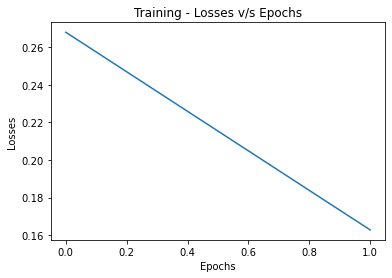

In [212]:
import matplotlib.pyplot as plt

plt.title('Training - Losses v/s Epochs')
plt.xlabel('Epochs') 
plt.ylabel('Losses')
plt.plot(range(len(losses_train)), losses_train)
plt.show()